# Приоретизация гипотез и проведение A/B теста для интернет-магазина

**ЦЕЛИ И ХОД ИССЛЕДОВАНИЯ**

**Вводные**\
Вместе с отделом маркетинга был подготовлен список из 9 гипотез для увеличения выручки в крупном интернет-магазине.

**Цели**\
Приоритизировать гипотезы, запустить A/B-тест, проанализировать результаты и принять решение по результатам проведения теста. 

**Задачи**\
Для решения вышеуказанных целей мы решим следующие задачи:

* Для приоретизации 9 гипотез применим фреймворки ICE и RICE 
* В рамках проведения A/B теста проанализируем графики кумулятивыной выручки и среднего чека по группам
* Проанализируем графики относительного изменения кумулятивного среднего количества заказов и среднего чека на посетителя группы B к группе A
* Проанализируем график кумулятивного среднего количества заказов на посетителя по группам
* Выявим аномалии в выборках
* Вычислим 95-й и 99-й перцентили стоимости заказов и кол-ва заказов на пользователя
* Определим статистическую значимость различий в среднем чеке заказа и средним кол-вом заказов между группами по «сырым» данным и «оцищенным» (без аномалий) данным


Структура ``/datasets/hypothesis.csv`` :\
•	Hypothesis — краткое описание гипотезы;\
•	Reach — охват пользователей по 10-балльной шкале;\
•	Impact — влияние на пользователей по 10-балльной шкале;\
•	Confidence — уверенность в гипотезе по 10-балльной шкале;\
•	Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Структура ``/datasets/orders.csv``:\
•	transactionId — идентификатор заказа;\
•	visitorId — идентификатор пользователя, совершившего заказ;\
•	date — дата, когда был совершён заказ;\
•	revenue — выручка заказа;\
•	group — группа A/B-теста, в которую попал заказ.

Структура ``/datasets/visitors.csv``:\
•	date — дата;\
•	group — группа A/B-теста;\
•	visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Приоритизация гипотез

### Применим фреймворк ICE для приоритизации гипотез

In [1]:
import pandas as pd
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [2]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
hypothesis['ICE']=hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts']

hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


Наиболее перспективные гипотезы по методу ICE - ``8, 0, 7``

### Применим фреймворк RICE для приоритизации гипотез

In [4]:
hypothesis['RICE']=(hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence'])/hypothesis['Efforts']
hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


Наиболее перспективные гипотезы по методу RICE - ``7, 2, 0, 6, 8``. **Явный лидер** - гипотеза ``7``.

In [5]:
pd.options.display.max_colwidth = 150
hypothesis.style.background_gradient(subset=[['RICE','ICE']], cmap="YlGnBu")
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2


### Выясним, как изменилась приоритизация гипотез при применении RICE вместо ICE

Гипотезы ``0 и 7`` приоритетны по результатам применения обоих фреймворков.\
В методе RICE гипотеза ``8`` уходит с 1го на 5й план. Причина  в том, что в методе ICE параметр Reach не учитывается. В Rice учитывается, и по исходным данным параметр Reach у гипотезы 8 один из самых низкоприоритетных.\
Выбор следует остановить между гипотезами 0 и 7, так как в обеих методах они занимают примерно равнозначное место. Гипотезу 8 рассматривать не стоит, так как она охватывает слишком мало людей.\
Я бы рекомендовала тестировать гипотезу ``7``, так как не смотря на то, что параметры Impact, Efforts и Confidence примерно равнозначны в гипотезах ``0 и 7``, в рамках ``7`` гипотезы охватывается в 3 раза больше людей.

## Анализ A/B-теста

In [6]:
# сохраним выгрузки и сохраним в переменные
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [7]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [8]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


Проверим, сколько групп участвовало в A/B тесте

In [9]:
orders['group'].unique()

array(['B', 'A'], dtype=object)

Проверим, сколько пользователей в каждой группе

In [10]:
orders.groupby('group', as_index=False).agg({'visitorId': 'nunique'})

,group,visitorId
0,A,503
1,B,586


*В группе В пользователей большое на 16%, чем в группе А*

In [11]:
visitors['group'].unique()

array(['A', 'B'], dtype=object)

Проверим - не попадают ли какие-то пользователи в обе группы

In [12]:
import numpy as np
ordersA=orders[orders['group']=="A"]
ordersB=orders[orders['group']=="B"]
# сохраним таких пользователей в отдельную переменную
common_visitorID=set(ordersA['visitorId'].unique()) & set(ordersB['visitorId'].unique())
common_visitorID

{8300375,
 199603092,
 232979603,
 237748145,
 276558944,
 351125977,
 393266494,
 457167155,
 471551937,
 477780734,
 818047933,
 963407295,
 1230306981,
 1294878855,
 1316129916,
 1333886533,
 1404934699,
 1602967004,
 1614305549,
 1648269707,
 1668030113,
 1738359350,
 1801183820,
 1959144690,
 2038680547,
 2044997962,
 2378935119,
 2458001652,
 2579882178,
 2587333274,
 2600415354,
 2654030115,
 2686716486,
 2712142231,
 2716752286,
 2780786433,
 2927087541,
 2949041841,
 2954449915,
 3062433592,
 3202540741,
 3234906277,
 3656415546,
 3717692402,
 3766097110,
 3803269165,
 3891541246,
 3941795274,
 3951559397,
 3957174400,
 3963646447,
 3972127743,
 3984495233,
 4069496402,
 4120364173,
 4186807279,
 4256040402,
 4266935830}

*Достаточно большое кол-во пользователей, которые попали в обе группы*

### Построем график кумулятивной выручки по группам

In [14]:
# импортируем необходимые библиотеки
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

Создадим массив уникальных пар значений дат и групп теста и избавимся от дубликатов.\
Соберём агрегированные кумулятивные по дням данные о заказах:
- Получим строки таблицы orders, дата которых меньше или равна дате элемента из datesGroups, а группа теста равна группе из datesGroups.
- Агрегируем значения, вычислим максимальную дату
- Найдём число уникальных ID заказов и пользователей
- Подсчитаем сумму средних чеков и применим методы к каждой строке датафрейма и отсортируем результаты по столбцам 'date' и 'group'

In [15]:
# преобразуем типы дат
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

# соберем агрегированные кумулятивные данные о выручке
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]


# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

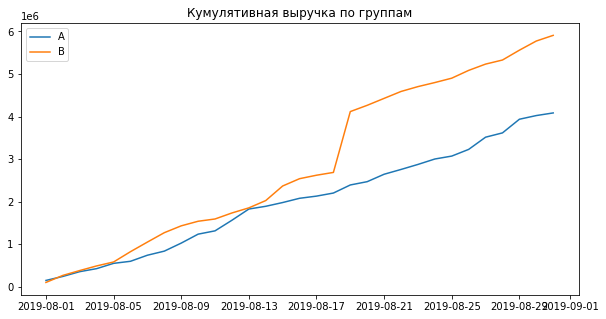

In [16]:
plt.figure(figsize = (10,5))
# построим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# построим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend() 
plt.title("Кумулятивная выручка по группам");

График показывает, что с самого начала теста сегмент В лидировал по показателям кумулятивной выручки. Выручка равномерно увеличивалсь до середины теста, а потом произошел более резкий скачок (18 августа), потом снова равномерный рост.\
Резкий скачок может говорить о выбросах: например, всплесках кол-ва заказов или о наличии высоких по стоимости заказов.\
Проанализируем выбросы позже

### Построим график кумулятивного среднего чека по группам

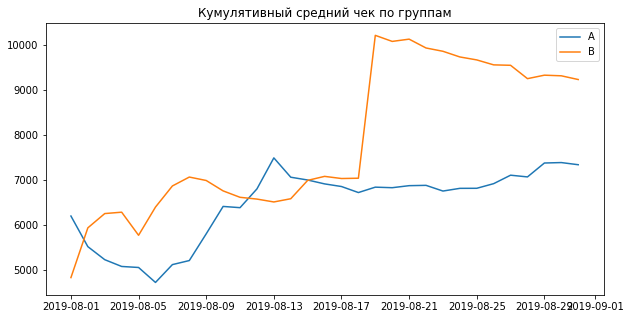

In [17]:
plt.figure(figsize = (10,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.title("Кумулятивный средний чек по группам");

Кумулятивное значение среднего распределяется неравномерно по обоим сегментам. В сегменте А есть достаточное резкое падение вначале (6 августа) и потом скачок роста ближе к середине (13 августа).\
У группы В тоже есть резкий скачок 18 августа, он совпадает со скачком по выручке. Скорей всего, в эту дату был сделан очень дорогой заказ.\
Требуется дополнительный анализ выбросов.

###	Построим график относительного изменения кумулятивного среднего чека группы B к группе A

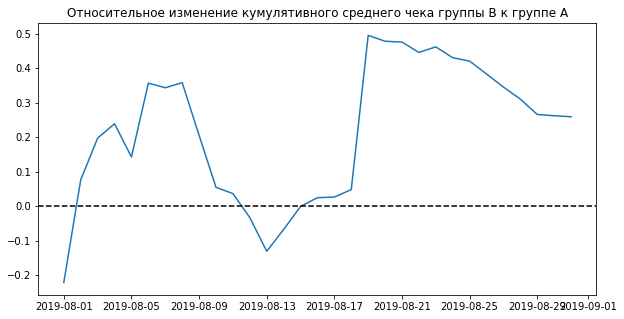

In [18]:
# собирем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize = (10,5))
# построим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавим ось X и название
plt.axhline(y=0, color='black', linestyle='--') 
plt.title("Относительное изменение кумулятивного среднего чека группы B к группе A");

График показывает, что на протяжении всего теста показатель по среднему чеку группы В лучше. Только с 10 по 14 августа показатели группы В были хуже.\
Мы снова видим резкие изменения роста в несколько дат.

### Построим график кумулятивного среднего количества заказов на посетителя по группам

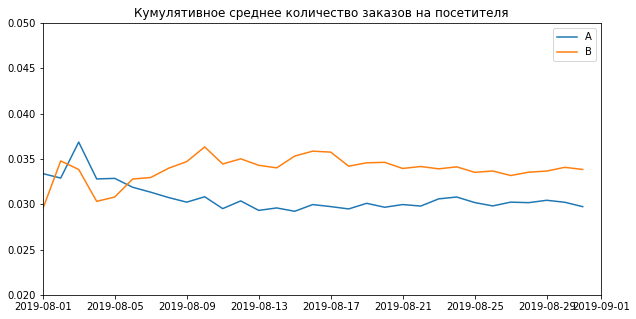

In [19]:
# посчитаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']


# строим графики
plt.figure(figsize = (10,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0.02, 0.05])
plt.title("Кумулятивное среднее количество заказов на посетителя");

В начале теста группа А имела бОльшую конверсию, но с 5-6 августа группа В опередила группу А и зафиксировалась. До конца теста группа В продолжала лидировать по показателям конверсии

### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

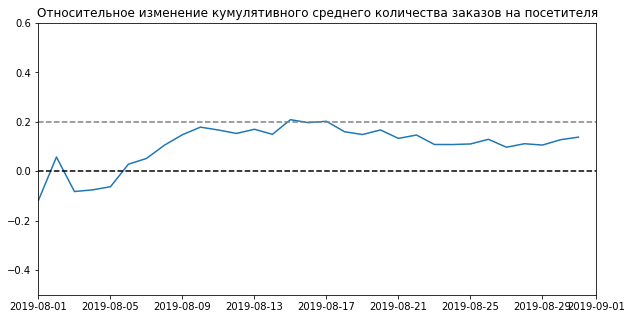

In [20]:
# объединим таблицы с кумулятивным кол-во заказов
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize = (10,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.5, 0.6])
plt.title("Относительное изменение кумулятивного среднего количества заказов на посетителя");

Как и на предыдущем графикке, вначале теста группа В уступала группе А по показателям, но с 6 августа опередила группу А и зафиксировалась на уровне прирост +20% к группе А.

``Промежуточный вывод:`` пока все данные говорят о том, что группа В более успешна. Но прежде, чем делать выводы, нужно проверить выборки на наличие аномалий.

### Построим точечный график количества заказов по пользователям

In [21]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [22]:
# найдем кол-во заказов по пользователям
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['visitorId', 'orders']
print(ordersByUsers.sort_values(by='orders', ascending=False))

       visitorId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
...          ...     ...
359   1484903144       1
360   1485964287       1
361   1494664757       1
362   1495112755       1
1030  4283872382       1

[1031 rows x 2 columns]


Есть пользователи, которые совершали 5, 8, 9 и 11 заказов - это гораздо больше, чем обычно совершает пользователь

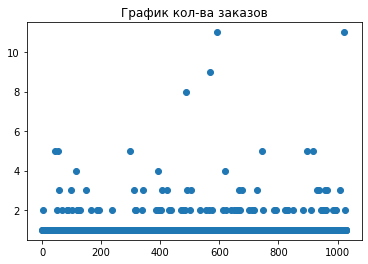

In [23]:
# построим точечную диаграмму
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 
plt.title("График кол-ва заказов");

График подтверждает выводы по ранее построенной таблице: у большинства пользователей - по 1-2 заказу. Пользователей с 2-3 заказами тоже не мало. А вот пользователей с 8-12 заказами очень мало, они могут быть аномальными. Выясним это далее, когда будем считать перцентили.

### Посчитайем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей

In [24]:
np.percentile(ordersByUsers['orders'],[90, 95,98, 99])

array([1., 2., 3., 4.])

Не более 10% пользователей совершали более 1 заказа.\
Не более 5% - более 2 заказов.\
Не более 2% - более 2 заказов.\
Не более 1% - более 4 заказов.

Поскольку принято отсеивать от 1% до 5% наблюдений с крайними значениями, за верхнюю границу числа заказов на одного пользователя стоит определить 2-3 заказа, и далее отсеять аномальных пользователей по ней.\
``Целесообразнее остановиться на пороге 3 (2%)``, так как пользователей с 2-3 заказами все-таки не мало. Вряд ли это аномалия.

### Построим точечный график стоимостей заказов. Сделаем выводы и предположения

In [25]:
# отсортируем таблицу с заказами по убыванию стоимости заказа
orders.sort_values(by='revenue', ascending=False)

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
...,...,...,...,...,...
933,3760662696,3577713868,2019-08-27,60,B
459,863448794,2738601405,2019-08-19,50,B
756,125335873,3423937755,2019-08-30,50,B
584,1126146019,2705308997,2019-08-20,50,A


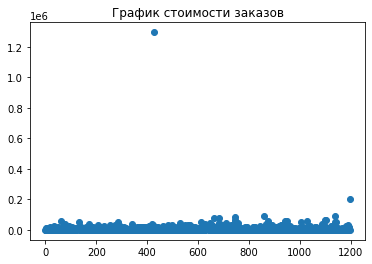

In [26]:
# построим точечный график
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title("График стоимости заказов");

В выборке есть явные выбросы - это заказы стоимостью 200 000 руб. и 1 300 000 руб.\
Увеличим график, чтобы изучить заказы до 300 000 р.

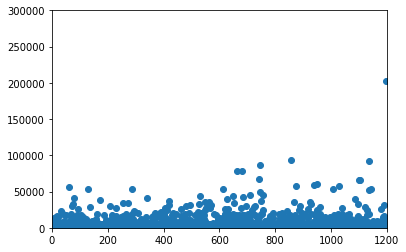

In [27]:
plt.scatter(x_values, orders['revenue']) 
plt.axis([0, 1200, 0, 300000]) ;

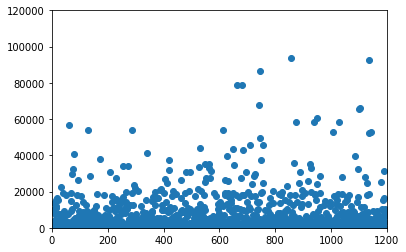

In [28]:
plt.scatter(x_values, orders['revenue']) 
plt.axis([0, 1200, 0, 120000]) ;

Заказы стоимостью выше 70 000 р выглядят аномальными, но прежде, чем делать вывод, определим перцентили.

### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов

In [29]:
np.percentile(orders['revenue'], [90, 95,98, 99])

array([18168. , 28000. , 44133.2, 58233.2])

Более 5% заказов имеют стоимость выше 28 000 руб.\
Более 1% заказов - более 58 000 руб.\
Все-таки пользователей с заказами более 28 000 руб. достаточно много, вряд ли это аномалия, просто крупные покупки совершаются реже.\
Поэтому, ``остановимся на границе 55 000 руб. (чуть больше 1%)`` Это всего 1% пользователей, но они оказывают влияние на общие показатели по группе.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Но сначала подготовим данные: создадим таблицу, в которой **в срезах по датам и группам** будут отображены: кол-во заказов, выручка, кумулятивное кол-во заказов, кумулятивная выручка, кол-во пользователей, кумулятивное кол-во пользователей.

In [30]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5)) 

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

In [31]:
#создаем переменную со столбцами ['visitorId', 'transactionId'], где для пользователей будет указано число заказов по группе А
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsersA.columns = ['visitorId', 'orders']

#создаем переменную со столбцами ['visitorId', 'transactionId'], где для пользователей будет указано число заказов по группе В

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 

#создадем переменную, в которой пользователям с заказами соответствует число их заказов, без заказов — нули, по группе А

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitors.query('group == "A"')['visitors']\
.sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

#создадем переменную, в которой пользователям с заказами соответствует число их заказов, без заказов — нули, по группе В 

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitors.query('group == "B"')['visitors']\
.sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

**Сформулируем гипотезы:**\
``Н0:`` различий в среднем количестве заказов на посетителя между группами А и В нет\
``Н1:`` различия в среднем количестве заказов на посетителя между группами А и В есть

Сначала определим, какой тип теста применить. Проверим выборки на нормальность с помощью метода Шапиро-Уилка

In [32]:
import scipy.stats as stats
from scipy import stats as st

alpha = 0.05
results= st.shapiro(sampleA)
p_value=results[1]

print('p-value:', results)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение выбокри А не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, выборка А распределена нормально')  

p-value: ShapiroResult(statistic=0.13177603483200073, pvalue=0.0)
Отвергаем нулевую гипотезу: распределение выбокри А не нормально


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [33]:
import scipy.stats as stats
from scipy import stats as st

alpha = 0.05
results= st.shapiro(sampleB)
p_value=results[1]

print('p-value:', results)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение выбокри B не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, выборка B распределена нормально')  

p-value: ShapiroResult(statistic=0.1508488655090332, pvalue=0.0)
Отвергаем нулевую гипотезу: распределение выбокри B не нормально


*Обе выборки распределены не нормально. В этом случае подойдет тест Уилкоксона-Манна-Уитни, который работает с рангами значений, а не с самимими значениями.\
Проведем тест*

In [34]:
#применяем критерий и форматируем p-value,выведим относительный прирост среднего числа заказов группы B 
alpha = 0.05
results= stats.mannwhitneyu(sampleA, sampleB)[1]
growth=(sampleB.mean() / sampleA.mean() - 1)

print('p-value:', results)
print("Прирост среднего кол-ва заказов группы В к группе А:", growth)

if results < alpha:
    print('Отвергаем нулевую гипотезу о том, что различий в среднем количестве заказов на посетителя между группами А и В нет. Различия есть и они статистически значимы')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, различий в среднем количестве заказов на посетителя между группами А и В действительно нет') 

p-value: 0.016792355056752608
Прирост среднего кол-ва заказов группы В к группе А: 0.13807884655320146
Отвергаем нулевую гипотезу о том, что различий в среднем количестве заказов на посетителя между группами А и В нет. Различия есть и они статистически значимы


Результат теста Уилкоксона-Манна-Уитни показал, что ``p-value`` значительно меньше ``alpha``, соответственно, разница между различиями в среднем кол-ве заказов между группой В и А есть и она статистически значима. Прирост по группе В составляет ``13%``

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

**Сформулируем гипотезы:**\
``Н0``: различий в среднем чеке между группами А и В нет\
``Н1``: различия в среднем чеке между группами А и В есть

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию ``mannwhitneyu()`` данные о выручке с заказов.\
Также найдём относительные различия в среднем чеке между группами

In [35]:
alpha = 0.05
results2= stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
growth2=(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)

print('p-value:', results2)
print("Прирост размера среднего чека в группе В vs группа А:", growth2)

if results2 < alpha:
    print('Отвергаем нулевую гипотезу о том, что различий в среднем чеке между группами А и В нет. Различия есть и они статистически значимы')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, различий в среднем чеке между группами А и В нет') 

p-value: 0.7292909855432458
Прирост размера среднего чека в группе В vs группа А: 0.2587136699126005
Не получилось отвергнуть нулевую гипотезу, различий в среднем чеке между группами А и В нет


Результат теста Уилкоксона-Манна-Уитни показал, что ``p-value`` значительно больше ``alpha``, соответственно, различий в среднем чеке между группами А и В действительно нет, или есть, но они статистически не значимы. Даже не смотря на то, что прирост по группе В составляет целых ``25%``

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

**Сформулируем гипотезы**:\
``Н0``: различий в среднем количестве заказов на посетителя между группами А и В нет\
``Н1``: различия в среднем количестве заказов на посетителя между группами А и В есть

Ранее при расчетах перценилей мы определии, что за аномальных пользователей будем считать тех, кто совершил ``более 3 заказов на сумму 55 000 руб.``\
Таким образом мы уберем  ``2% пользователей с наибольшим кол-вом заказов`` и чуть больше ``1% с дорогими заказами``.

Сделаем срезы пользователей с числом заказов больше 3 — *usersWithManyOrders* и пользователей, совершивших заказы дороже 55 000 — *usersWithExpensiveOrders*. Объединим их в таблице *abnormalUsers*. 

In [36]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 55000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))

# узнаем, сколько всего аномальных пользователей
print(abnormalUsers.shape[0]) 

1099    148427295
18      199603092
23      237748145
949     887908475
744     888512513
Name: visitorId, dtype: int64
20


Получилось 20 аномальных пользователей. Далее узнаем, как они повлияли на результаты теста.\
Сначала подготовим выборки количества заказов по пользователям по группам теста

In [37]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

Проведем тест

In [38]:
alpha = 0.05
results3= stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]
growth3=(sampleBFiltered.mean()/sampleAFiltered.mean()-1)

print('p-value:', results3)
print("Прирост среднего кол-ва заказов группы В к группе А:", growth3)

if results3 < alpha:
    print('Отвергаем нулевую гипотезу о том, что различий в среднем количестве заказов на посетителя между группами А и В нет. Различия есть и они статистически значимы')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, различий в среднем количестве заказов на посетителя между группами А и В действительно нет') 

p-value: 0.013904990762429726
Прирост среднего кол-ва заказов группы В к группе А: 0.15103304987438104
Отвергаем нулевую гипотезу о том, что различий в среднем количестве заказов на посетителя между группами А и В нет. Различия есть и они статистически значимы


Результаты по среднему количеству заказов по очищенным данным практически не изменились: p-value почти одинаковое, прирост группы В vs группа А составил 15% (+2% vs по "сырым" данным). Разница статистически значима.

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

**Сформулируем гипотезы**:\
``Н0``: различий в среднем чеке между группами А и В нет\
``Н1``: различия в среднем чеке заказов на посетителя между группами А и В есть

Узнаем, изменились ли результаты по среднему чеку

In [39]:
alpha = 0.05
results4= stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],)[1]
growth4=orders[np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean()/ orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean()- 1

print('p-value:', results4)
print("Прирост размера среднего чека группы В к группе А:", growth4)

if results4 < alpha:
    print('Отвергаем нулевую гипотезу о том, что различий в среднем чеке между группами А и В нет. Различия есть и они статистически значимы')
else:
    print('Не получилось отвергнуть нулевую гипотезу, различий в среднем чеке между группами А и В нет') 

p-value: 0.9588470797464653
Прирост размера среднего чека группы В к группе А: -0.013852493303816549
Не получилось отвергнуть нулевую гипотезу, различий в среднем чеке между группами А и В нет


Выводы по результатам теста по очищенным данным: группа В не лучше группы А по среднему чеку, а даже чуть ниже на 0.01%.\
p-value больше 0.05, разница между группами статистически не значима.\
Видно, как выбросы влияли на показатель, ведь по "сырым" данные прирост среднего чека в группе В составлял +25% vs группа А.

``По результатов проведения тестов мы имеем следующие факты``:
* ``Есть`` статистически значимое различие по среднему количеству заказов между группами и по «сырым», и по данным после фильтрации аномалий;
* ``Нет`` статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
* График различия среднего количества заказов между группами демонстрирует, что результаты группы B стабильно ``лучше`` группы A и нет тенденции к ухудшению

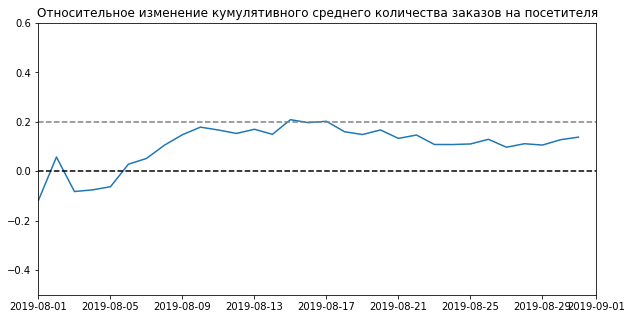

In [40]:
plt.figure(figsize = (10,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.5, 0.6])
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя');

* График различия среднего чека колеблется и изменяется. Сделать какие-то определенные выводы из данного графика сложно.

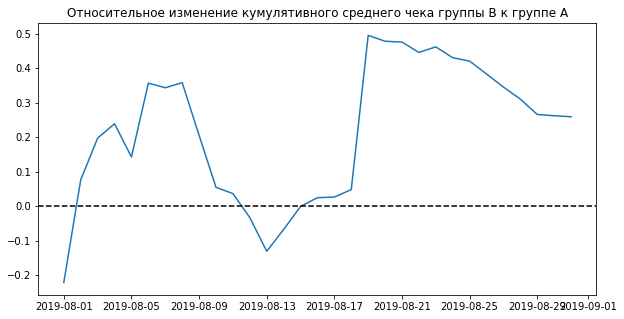

In [41]:
plt.figure(figsize = (10,5))
# построим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавим ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.title("Относительное изменение кумулятивного среднего чека группы B к группе A");

**РЕШЕНИЕ**:\
Исходя из фактов выше, я бы рекомендовала ``остановить тест и признать его успешным``.\
Не смотря на то, что после очистки данных от аномалий результаты тестов показали, что нет различия по среднему чеку между группой А и группой В, по среднему кол-ву заказов группа В стабильно лидирует, и эта разница статистически значима.\
Так как наша цель - увеличение выручки, рост кол-ва заказов при сохранении +/- текущего среднего чека определенно может привести нас к данной цели.